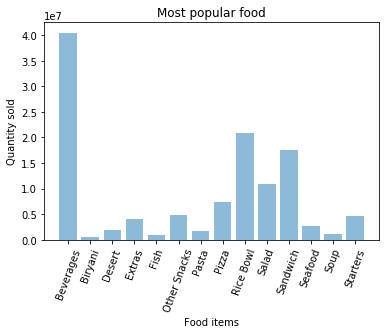

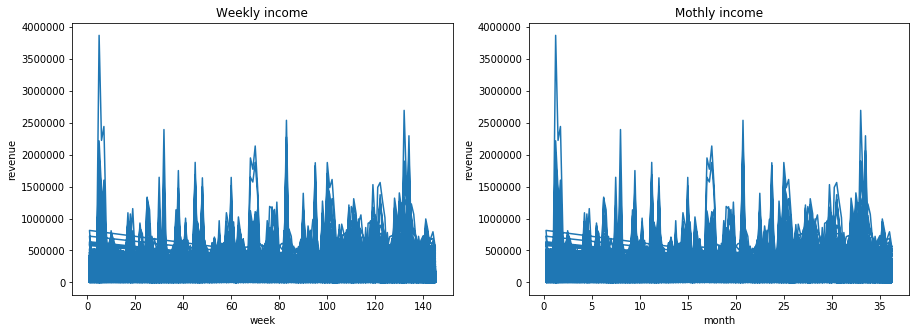

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

meal_csv_path = './resources/meal_info.csv'
df_meal = pd.read_csv(meal_csv_path)

center_csv_path = './resources/fulfilment_center_info.csv'
df_center = pd.read_csv(center_csv_path)

food_csv_path = './resources/train.csv'
df_food = pd.read_csv(food_csv_path)

df = pd.merge(df_food, df_center, on='center_id')
df = pd.merge(df, df_meal, on='meal_id')

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)

x_axis = table.index
y_axis = table['num_orders']

plt.xticks(rotation=70) 

plt.xlabel('Food items')

plt.ylabel('Quantity sold')

plt.title('Most popular food')

plt.bar(x_axis, y_axis, align='center', alpha=0.5)

plt.savefig('./bar1.png')

plt.show()

rev = df['checkout_price'] * df['num_orders']
df['revenue'] = rev
df['month'] = df['week']/4
gk = df.groupby('month')
month = df['month']
month_order = df['revenue']
gk = df.groupby('week')
week = df['week']
week_order = df['revenue']
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
ax1.plot(week, week_order, label = 'weekly')
ax1.set_title('Weekly income')
ax1.set_xlabel('week')
ax1.set_ylabel('revenue')
ax2.plot(month, month_order, label = 'monthly')
ax2.set_title('Mothly income')
ax2.set_xlabel('month')
ax2.set_ylabel('revenue')
fig.savefig('./subplot1.png')